NAME: BENJAMIN OWUSU - ANSAH

INDEX NUMBER: 4295020

COURSE: TROPICAL WEATHER SYSTEMS

Data Assimilations: refers to the process of combining observational data with numerical models to produce an accurate representation of the state of a physical system. In meteorology and climate science, data assimilation plays a crucial role in improving weather forecasts, climate projections, and our understanding of atmospheric and oceanic processes (Kalnay, 2003; Reichle, 2008).

Moreover, Data assimilation is an analysis technique in which the observed information is accumulated into the model state by taking advantage of consistency constraints with laws of time evolution and physical properties (F. Bouttier et al.,1999). 

In [1]:
# IMPORTING THE NECESSARY LIBRAIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from warnings import filterwarnings
filterwarnings('ignore')

Observations: The actual measured temperatures.

Model Output: The predicted temperatures from the Numerical Weather Prediction model.

In [2]:
# Sample observational data (in degrees Celsius)
observations = np.array([15.2, 16.1, 14.5, 15.8, 25.0])

# Sample model predictions (in degrees Celsius)
model_output = np.array([14.8, 15.5, 14.0, 16.0, 25.3])

Optimal Interpolation (OI): OI is a method to combine observations and model output to produce an analysis field.

Moreover, OI is a basic form of data assimilation that combines observations and model outputs based on their respective error variances.

The analysis field is a weighted average of the observations and the model output.

The weights are determined based on the error variances of the observations and the model output.

Calculate error variances and weights:
    
Observation error variance (observation_error_variance):  The variance of the observational data.
        
Model error variance (model_output_error_variance):   The variance of the model output.
    
The weights for the observations (weight_observations).

The model output (model_output) can be calculated using these variances.

In [3]:
# Calculate error variances
observation_error_variance = np.var(observations)
model_output_error_variance = np.var(model_output)

# Calculate weights
weight_observations = model_output_error_variance / (observation_error_variance + model_output_error_variance)
weight_model_output = observation_error_variance / (observation_error_variance + model_output_error_variance)

print(f"Observation weight (weight_observations): {weight_observations}")
print(f"Model output weight (weight_model_output): {weight_model_output}")

Observation weight (weight_observations): 0.533139708072684
Model output weight (weight_model_output): 0.46686029192731604


Compute the analysis fields:
The analysis field is a weighted combination of the observations and the model output.

Analysis = weight_observations × observations + weight_model_output × model_output

In [4]:
analysis = weight_observations  * observations + weight_model_output * model_output

print("Analysis fields:", analysis)

Analysis fields: [15.01325588 15.81988382 14.26656985 15.89337206 25.14005809]


The RMSE and bias for the analysis fields compared to the observations and model output to evaluate the improvements made by the data assimilation process.

In [5]:
# Calculate RMSE
def calculate_rmse(true_values, predictions):
    return np.sqrt(np.mean((true_values - predictions) ** 2))

# Calculate Bias
def calculate_bias(true_values, predictions):
    return np.mean(predictions - true_values)

# RMSE and Bias for the analysis fields
rmse_analysis_obs = calculate_rmse(observations, analysis)
bias_analysis_obs = calculate_bias(observations, analysis)

rmse_analysis_model = calculate_rmse(model_output, analysis)
bias_analysis_model = calculate_bias(model_output, analysis)

print(f"RMSE (Analysis vs Observations): {rmse_analysis_obs}")
print(f"Bias (Analysis vs Observations): {bias_analysis_obs}")

print(f"RMSE (Analysis vs Model Output): {rmse_analysis_model}")
print(f"Bias (Analysis vs Model Output): {bias_analysis_model}")

RMSE (Analysis vs Observations): 0.19807204697312247
Bias (Analysis vs Observations): -0.09337205838546332
RMSE (Analysis vs Model Output): 0.22619202173880623
Bias (Analysis vs Model Output): 0.10662794161453668


In [6]:
print(pd.DataFrame(
    { "OBSERVATIONS(°C)": observations,
      "MODEL OUTPUT(°C)": model_output,
      "ANALYZED DATA(°C)": analysis,
      "RMSE": rmse_analysis_obs,
      "BIAS ERROR": bias_analysis_obs,
    }
))

   OBSERVATIONS(°C)  MODEL OUTPUT(°C)  ANALYZED DATA(°C)      RMSE  BIAS ERROR
0              15.2              14.8          15.013256  0.198072   -0.093372
1              16.1              15.5          15.819884  0.198072   -0.093372
2              14.5              14.0          14.266570  0.198072   -0.093372
3              15.8              16.0          15.893372  0.198072   -0.093372
4              25.0              25.3          25.140058  0.198072   -0.093372


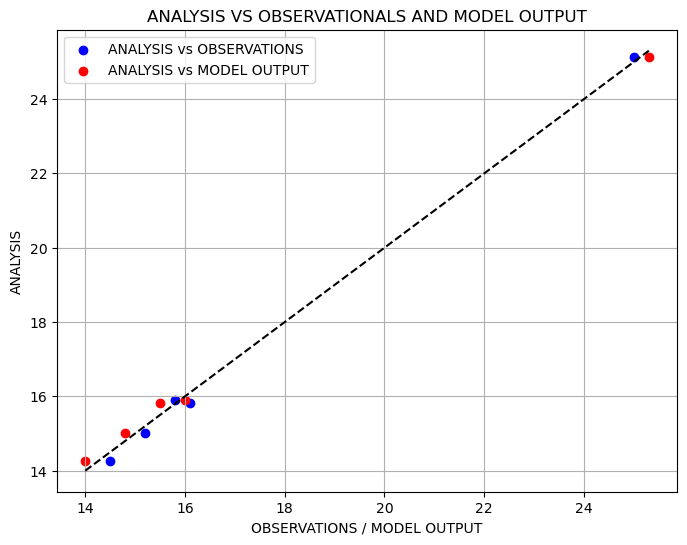

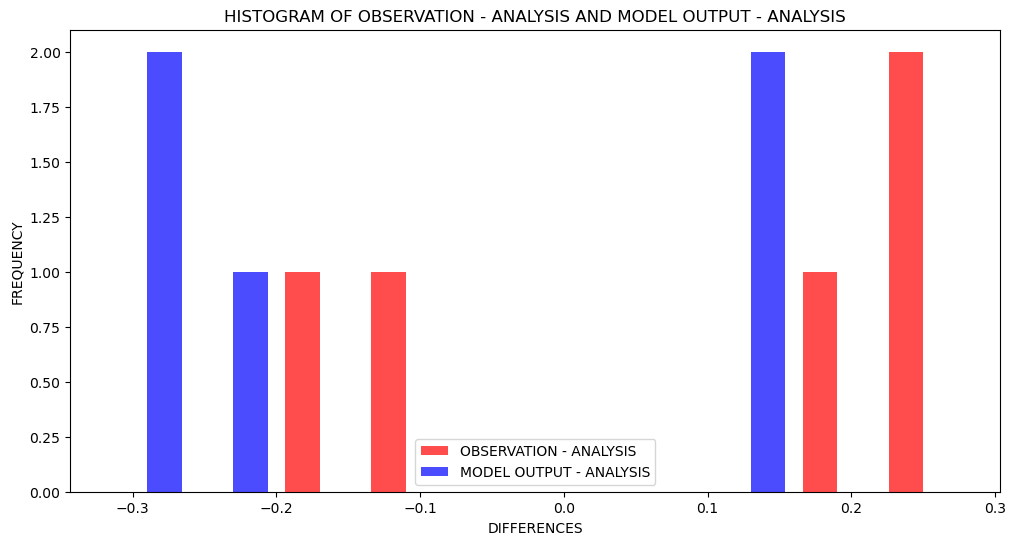

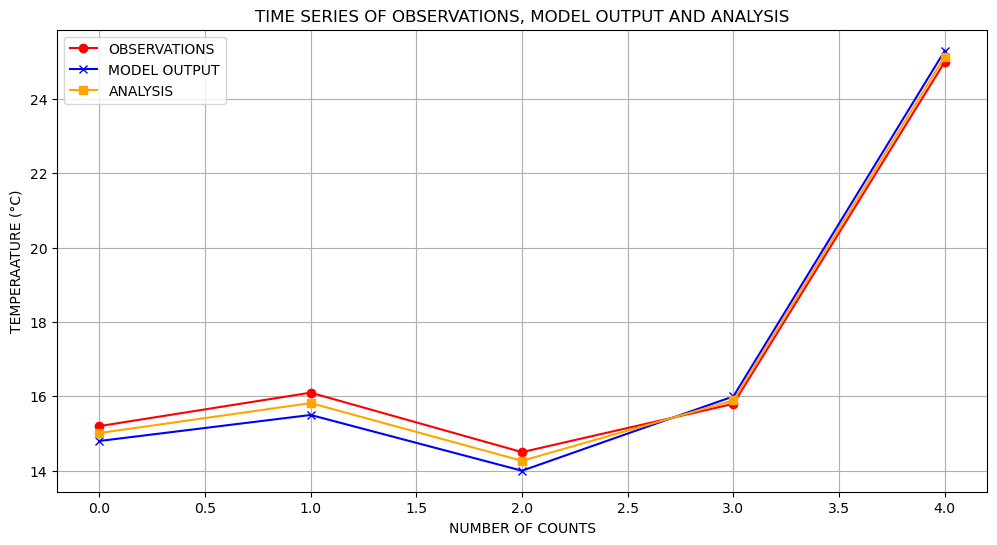

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(observations, analysis, color='blue', label='ANALYSIS vs OBSERVATIONS')
plt.scatter(model_output, analysis, color='red', label='ANALYSIS vs MODEL OUTPUT')
plt.plot([min(min(observations), min(model_output)), max(max(observations), max(model_output))], 
         [min(min(observations), min(model_output)), max(max(observations), max(model_output))], 'k--')
plt.xlabel('OBSERVATIONS / MODEL OUTPUT')
plt.ylabel('ANALYSIS')
plt.legend()
plt.title('ANALYSIS VS OBSERVATIONALS AND MODEL OUTPUT')
plt.grid(True)
plt.show()

# Histogram 
plt.figure(figsize=(12, 6))
plt.hist([observations - analysis, model_output - analysis], 
         label=['OBSERVATION - ANALYSIS', 'MODEL OUTPUT - ANALYSIS'], 
         bins=10, alpha=0.7, color=['red', 'blue'])
plt.xlabel('DIFFERENCES')
plt.ylabel('FREQUENCY')
plt.legend()
plt.title('HISTOGRAM OF OBSERVATION - ANALYSIS AND MODEL OUTPUT - ANALYSIS')
plt.show()

# Time series plot
plt.figure(figsize=(12, 6))
plt.plot(observations, label='OBSERVATIONS', marker='o',color ='red')
plt.plot(model_output, label='MODEL OUTPUT', marker='x',color = 'blue')
plt.plot(analysis, label='ANALYSIS', marker='s',color = 'orange')
plt.xlabel('NUMBER OF COUNTS')
plt.ylabel('TEMPERAATURE (°C)')
plt.grid(True)
plt.legend()
plt.title('TIME SERIES OF OBSERVATIONS, MODEL OUTPUT AND ANALYSIS')
plt.show()